<a href="https://colab.research.google.com/github/ltnalsxl/git_team3/blob/master/Tobigs_week1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 투빅스 15기 정규세션 Week1 EDA - 15기 이수민

In [ ]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

plt.style.use('seaborn')
plt.rc('font', family='Nanum Gothic')
plt.rc('axes', unicode_minus=False)

from collections import Counter

# 1. Data

In [ ]:
data = pd.read_csv("과제데이터.csv")

## 1-1 Data 파악하기

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

이 데이터는 10886개의 데이터와 12개의 feature들로 구성되어 있습니다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


현재 datetime변수를 제외하고는 모두 수치형 값으로 나타내어져 있지만, 추후에 범주형 변수로의 변환이 필요할 수 있습니다.

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1-2 변수 파악


- **datetime** - hourly date + timestamp
- **season**
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather**
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

1개의 날짜변수 (datetime)과 4개의 범주형 변수 (season, holiday, workingday, weather), 7개의 수치형 변수 (temp, atemp, humidity, windspeed, casual, registered, count)로 이루어져 있습니다.  
이때 총 대여 수를 의미하는 `count`변수를 타깃 변수로 삼는다면, 유의미한 분석 결과를 얻어낼 수 있을 것이라 생각합니다.

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#변수 name 단순화
data.rename(columns={'holiday':'h_day',
                   'workingday':'w_day',}, inplace=True)
data.columns

#'count' 변수 이름 변경
data.rename(columns={'count':'num'}, inplace=True)
data.columns

Index(['datetime', 'season', 'h_day', 'w_day', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'num'],
      dtype='object')

`holiday`와 `workingday`는 각각 `h_day`, `w_day`로 변경해주었으며, Python에서 고유하게 쓰이는 `count`라는 변수 이름에 혼동이 올 확률이 있으므로 `num`이라는 변수로 바꿔줍니다.

범주형 변수의 Class 개수를 파악합니다

In [ ]:
#범주형 변수
print('season: {}'.format(len(np.unique(data.season))))
print('holiday : {}'.format(len(np.unique(data.h_day))))
print('workingday : {}'.format(len(np.unique(data.w_day))))
print('weather : {}'.format(len(np.unique(data.weather))))

season: 4
holiday : 2
workingday : 2
weather : 4


어느 데이터도 속해있지 않는 범주형 변수의 class는 없다는 것을 알 수 있습니다.

Countplot을 통해 전체 데이터에 범주형 변수가 어떻게 분포되어 있는지를 확인합니다.

Counter({1: 7192, 2: 2834, 3: 859, 4: 1})

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


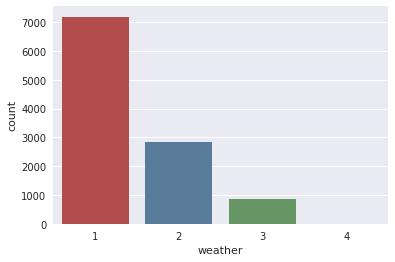

In [ ]:
sns.countplot(x='weather', data=data, saturation=0.5, palette= 'Set1')
Counter(data['weather'])

Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (4) 혹은 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (3) 를 동반하는 날씨는 일반적이지 않기 때문에 1,2 class에 비해 비율이 현저히 적으며, 4에 해당하는 data는 하나밖에 없다. 

Counter({1: 2686, 2: 2733, 3: 2733, 4: 2734})

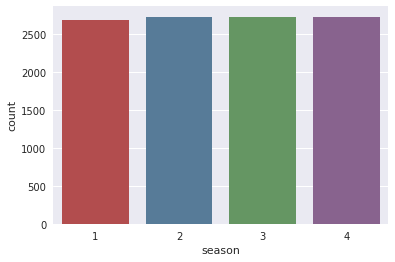

In [ ]:
sns.countplot(x='season', data=data, saturation=0.5, palette= 'Set1')
Counter(data['season'])

Counter({0: 10575, 1: 311})

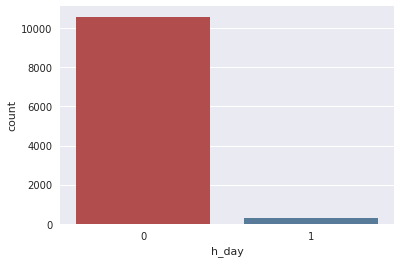

In [ ]:
sns.countplot(x='h_day', data=data, saturation=0.5, palette= 'Set1')
Counter(data['h_day'])

Counter({0: 3474, 1: 7412})

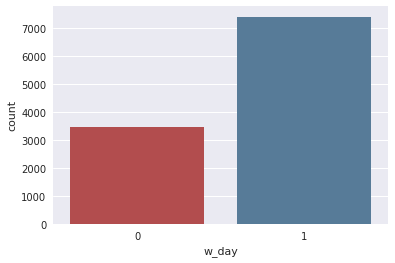

In [ ]:
sns.countplot(x='w_day', data=data, saturation=0.5, palette= 'Set1')
Counter(data['w_day'])

Holiday는 전체 데이터 중 굉장히 낮은 비율을 차지하고 있으며, working day에서의 class 비율은 약 1:2 가량이다. 

# 2. Preprocessing

## 2-1 결측치 확인

In [ ]:
data.isna().sum()

datetime      0
season        0
h_day         0
w_day         0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
num           0
dtype: int64

In [ ]:
data.isnull().sum()

datetime      0
season        0
h_day         0
w_day         0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
num           0
dtype: int64

결측치는 없다는 것을 확인하였습니다.

## 2-2 이상치 확인

결측치는 존재하지 않지만 이상치가 존재할 경우 제거해야 하기 때문에 변수들의 값을 확인하는 과정을 거칩니다.


In [ ]:
print(data['datetime'].unique())
print(data['temp'].unique())
print(data['atemp'].unique())
print(data['humidity'].unique())
print(data['windspeed'].unique())
print(data['casual'].unique())
print(data['registered'].unique())
print(data['num'].unique())

['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  5

특별히 눈에 띄는 값은 보이지 않는 것을 알 수 있습니다.

In [ ]:
numerical = ['temp','atemp','humidity','windspeed','casual','registered','num'] #datetime 제외
data[numerical].describe()

,temp,atemp,humidity,windspeed,casual,registered,num
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


수치형 변수 값을 그래프로 나타내어 이상치를 탐색합니다.

Text(0.5, 0.98, 'Histogram (Numerical Variables)')

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


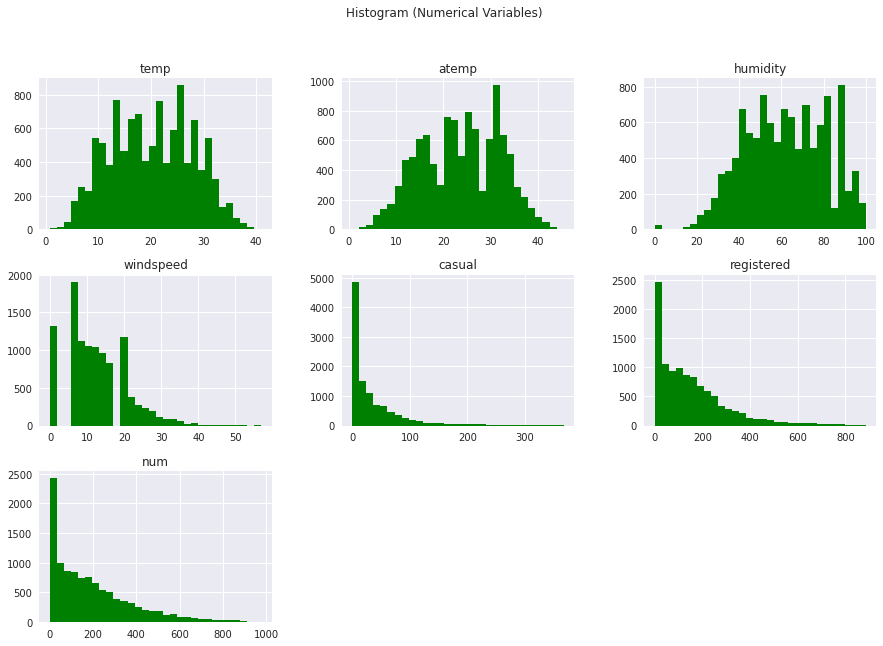

In [ ]:
data[numerical].hist(bins=30, figsize=(15,10), color = 'g')
plt.suptitle("Histogram (Numerical Variables)", fontsize=12)

특별히 이상치로 의심되는 값은 보이지 않는다는 것을 알 수 있습니다. 

## 2-3 상관관계

데이터의 수치형 변수 간의 상관관계를 파악합니다.

In [ ]:
data[numerical].corr()

,temp,atemp,humidity,windspeed,casual,registered,num
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
num,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


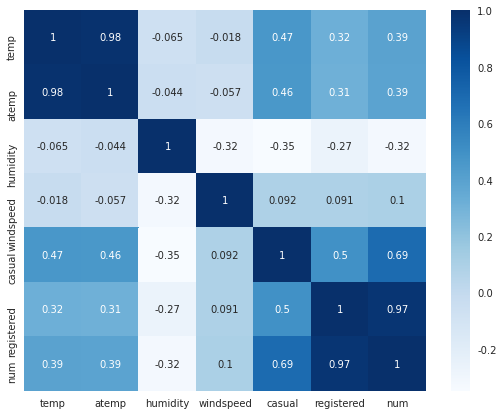

In [ ]:
plt.subplots(figsize=(9,7)) 
sns.heatmap(data[numerical].corr(),cmap='Blues', annot=True)
plt.show()

Correlation이 커 다중공선성 문제를 일으킬 수 있는 변수로는 `atemp`와 `temp`, 그리고 `registered`와 `count`가 있습니다.

## 2-4  수치형 변수에 대해 로그 변환
  
변수  `windspeed`, `casual`, `registered`,`num`의 그래프를 보면, 왼쪽으로 치우쳐져 있는 것을 알 수 있다. 이 중 `num`과 `registered`는 타깃 변수로 사용될 확률이 높기 때문에 로그변환을 하지 않고, 2개의 변수에 대한 로그 변환을 진행해주었습니다.

In [ ]:
data['log_windspeed'] = np.log(data['windspeed'])
data['log_casual'] = np.log(data['casual']) 

In [ ]:
print(data.shape)
data1 = data[data['log_windspeed']> 0]
print(data1.shape)
data1 = data1[data1['log_casual']> 0] 
print(data1.shape)

(10886, 14)
(9573, 14)
(8186, 14)


변수 별로 로그 변환 과정에서 발생한 결측치들을 제거해주었으며, Log casual을 변환할 경우 1400개 가량의 데이터 손실이 일어남으로 log_casual을 제외한 나머지 한 개의 변수에 대해 로그 변환을 실행해주었다.

In [ ]:
print(data.shape)
data = data[data['log_windspeed']> 0]
print(data.shape)
data = data.reset_index()

(10886, 14)
(9573, 14)


변환을 진행해준 결과, 두 개의 변수에 대해서 로그 변환을 했을 때보다 데이터 유실량이 감소하였습니다.

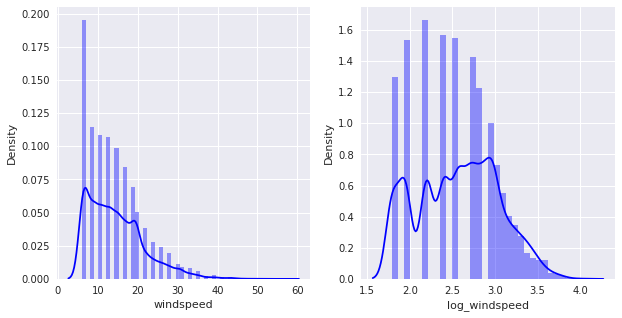

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(data['windspeed'], ax=axes[0], color="b")
sns.distplot(data['log_windspeed'], ax=axes[1], color="b")
plt.show()

# 3. 날짜 관련 분석

## 3-1 날짜 변수 생성 및 파악

현재 datetime 변수가 datetime 형식이 아닌 일반적인 문자열 형식으로 되어 있는 것을 확인하였습니다.

In [ ]:
data['datetime']

0       2011-01-01 05:00:00
1       2011-01-01 10:00:00
2       2011-01-01 11:00:00
3       2011-01-01 12:00:00
4       2011-01-01 13:00:00
               ...         
9568    2012-12-19 19:00:00
9569    2012-12-19 20:00:00
9570    2012-12-19 21:00:00
9571    2012-12-19 22:00:00
9572    2012-12-19 23:00:00
Name: datetime, Length: 9573, dtype: object

우선 datetime library를 import하고, datetime의 형태를 `'%Y-%m-%d  %H:%M:%S'` 형식으로 변환해줍니다.

In [ ]:
#datetime 형식으로 변경
import datetime

dt_list = []
for i in range(len(data)):
  datetime_str = data['datetime'][i]
  dt_i = datetime.datetime.strptime(datetime_str, '%Y-%m-%d  %H:%M:%S')
  dt_list.append(dt_i)

data['datetime_dt'] = dt_list

In [ ]:
data['datetime_dt']

0      2011-01-01 05:00:00
1      2011-01-01 10:00:00
2      2011-01-01 11:00:00
3      2011-01-01 12:00:00
4      2011-01-01 13:00:00
               ...        
9568   2012-12-19 19:00:00
9569   2012-12-19 20:00:00
9570   2012-12-19 21:00:00
9571   2012-12-19 22:00:00
9572   2012-12-19 23:00:00
Name: datetime_dt, Length: 9573, dtype: datetime64[ns]

dtype이 **object**에서 **datetme**으로 변경된 것을 확인할 수 있습니다.

datetime 변수를 year/month/date/hour/day로 구분하여 각 변수를 생성합니다.

- year: 연도 (2011/2012)
- month: 월
- date: 일
- hour: 시간
- day: 요일 (월/화/수/목/금/토/일)
- day_night: 낮/밤 (06시 - 17시: day, 18시 - 05시: night으로 구분)

In [ ]:
data['year'] = data['datetime_dt'].dt.year #연도
data['month'] = data['datetime_dt'].dt.month #월
data['hour'] = data['datetime_dt'].dt.hour #시간
data['day'] = data['datetime_dt'].dt.weekday #요일

def func(x) :
    if 6 < x < 17 :
        return 'day'
    else :
        return 'night'

data["day_night"] = data["hour"].apply(lambda x : func(x)) #낮/밤

data['date'] = data['datetime_dt'].dt.date #일
d_list = []

for i in range(len(data)):
  date = data['date'].astype(str)
  date = date[i]
  m,d,date = date.split('-')
  d_list.append(date)

data['date'] = d_list

## 3-2 분석

### 요일별 평균 대여량

0부터 6으로 표시되어 있는 `day`변수의 값들에 각각 요일을 할당합니다.

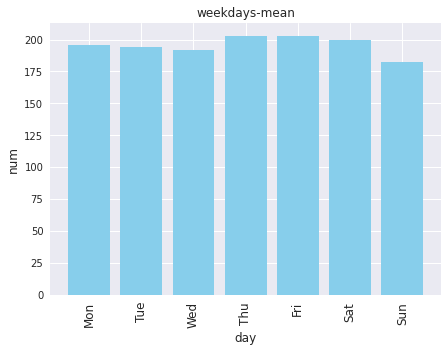

In [ ]:
label = ['Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))

plt.subplots(figsize=(7,5)) 
data_day_mean = data.groupby(['day'], as_index=False).mean()
data_day_mean_num = data_day_mean[["day", "num"]] #feature 1
data_day_mean_num = data_day_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_day_mean_num['day'],data_day_mean_num['num'], color = 'skyblue')
plt.title('weekdays-mean')
plt.xlabel('day', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=90)
plt.show()


변수가 올바르게 생성되었으며, 요일에 따른 대여량의 차이는 없는 것을 확인할 수 있습니다.

### **요일별 낮/밤 평균 대여량 비교**

day_night 변수를 활용해 요일 별 낮과 밤에 따른 대여량의 차이를 비교합니다.

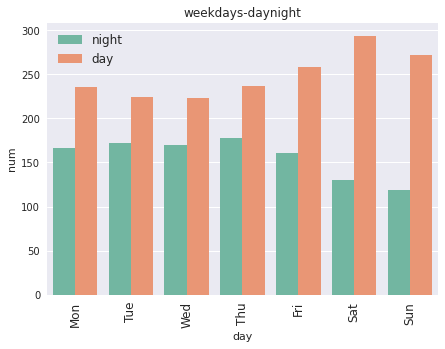

In [ ]:
# Dodged Bar Chart

plt.subplots(figsize=(7,5)) 
sns.barplot(x='day', y='num', hue='day_night', data=data, palette = 'Set2', ci=False)
plt.title('weekdays-daynight', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=90)
plt.show()

주말(sat, sun)에 낮에 대여량이 증가하고 밤에는 대여량이 감소한다는 것을 알 수 있으며, 주중 대여량은 큰 차이 없이 모두 비슷한 대여량 수치를 보인다는 것을 알 수 있습니다.

### **시간대별 대여량**

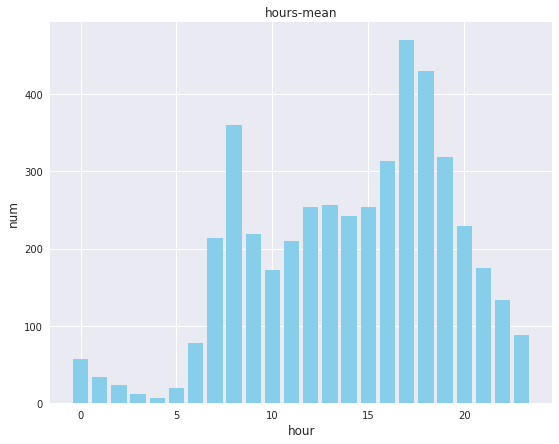

In [ ]:
plt.subplots(figsize=(9,7)) 
data_hour_mean = data.groupby(['hour'], as_index=False).mean()
data_hour_mean_num = data_hour_mean[["hour", "num"]] #feature 1
data_hour_mean_num = data_hour_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_hour_mean_num['hour'],data_hour_mean_num['num'], color = 'skyblue')
plt.title('hours-mean')
plt.xlabel('hour', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()


시간대별 대여량을 살펴보면, 하루 중 가장 대여량이 많은 시간대는 퇴근 시간에 해당하는 **17시와 18시**, 그리고 출근 시간인 **오전 08시**임을 알 수 있었습니다. 21시 이후부터 사용량이 대폭 감소하며 새벽에는 사용량이 거의 없다가 오전 07시부터 본격적으로 대여가 시작됨을 알 수 있습니다.

### **월별 대여량**

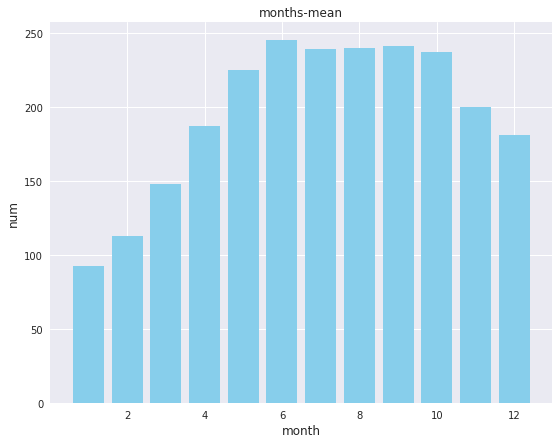

In [ ]:
plt.subplots(figsize=(9,7))
data_month_mean = data.groupby(['month'], as_index=False).mean()
data_month_mean_num = data_month_mean[["month", "num"]] #feature 1
data_month_mean_num = data_month_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_month_mean_num['month'],data_month_mean_num['num'], color = 'skyblue')
plt.title('months-mean')
plt.xlabel('month', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

월별 평균 대여량을 비교해보면, 겨울에 해당하는 1월과 2월에 대여량이 가장 적으며, 이후 날씨가 풀리는 3월과 4월에 조금씩 증가하다가 6월부터 10월 간 가장 대여량이 많은 것을 볼 수 있습니다.

### **일별 대여량**

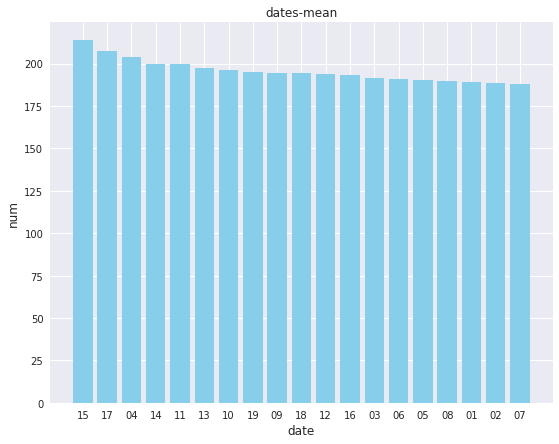

In [ ]:
plt.subplots(figsize=(9,7))
data_date_mean = data.groupby(['date'], as_index=False).mean()
data_date_mean_num = data_date_mean[["date", "num"]] #feature 1
data_date_mean_num = data_date_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_date_mean_num['date'],data_date_mean_num['num'], color = 'skyblue')
plt.title('dates-mean')
plt.xlabel('date', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

일별 대여량에는 큰 차이가 없습니다. 다만 달의 시작인 01일에 평균적으로 가장 적은 대여량을 기록한 것을 알 수 있습니다.

# 4. 날씨 관련 분석

## 4-1 날씨(weather)에 따른 대여량

In [ ]:
data['weather'] == data['weather'].astype(str)
print(data['weather'].unique())

[2 1 3 4]


  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [ ]:
data[data['weather'] == 4]

,index,datetime,season,h_day,w_day,weather,temp,atemp,humidity,windspeed,casual,registered,num,log_windspeed,log_casual,datetime_dt,year,month,hour,day,day_night,date
4921,5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,1.792293,1.791759,2012-01-09 18:00:00,2012,1,18,0,night,09


전체 데이터 중 Level 4에 해당되는 날씨는 하루 밖에 없었습니다.  
아래의 Plot을 통해 일반적으로 비가 내리지 않고 눈이 오지 않는 날씨일 때보다 그렇지 않을 때에 대여량이 감소하는 추세는 볼 수 있지만, 아래 그래프에서 Level4에 해당되는 값은 평균이 아닌 하루의 수치일 것이기 때문에 (data의 개수가 하나이기 때문) bias가 있는 plot이 생성될 것이라고 생각합니다. 그러므로 group별 평균을 낸 아래의 mean plot은 Level3과 4를 비교하는 데에는 무리가 있습니다.

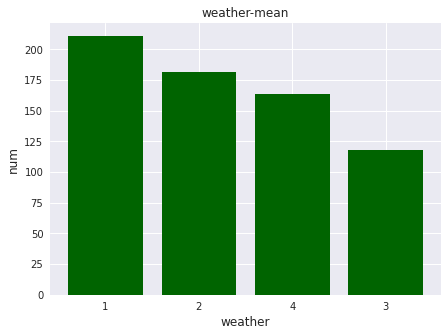

In [ ]:
data['weather'] = data['weather'].astype(str)

plt.subplots(figsize=(7,5))
data_weather_mean = data.groupby(['weather'], as_index=False).mean()
data_weather_mean_num = data_weather_mean[["weather", "num"]] #feature 1
data_weather_mean_num = data_weather_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_weather_mean_num['weather'],data_weather_mean_num['num'], color = 'darkgreen')
plt.title('weather-mean')
plt.xlabel('weather', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

## 4-2 계절(season)별 대여량

In [ ]:
Counter(data['season'])

Counter({1: 2423, 2: 2465, 3: 2383, 4: 2302})

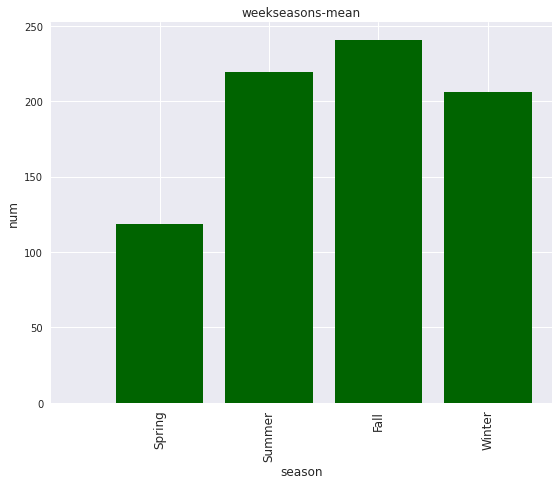

In [ ]:
label = ['','Spring','Summer','Fall','Winter']
index = np.arange(len(label))

plt.subplots(figsize=(9,7))
data_season_mean = data.groupby(['season'], as_index=False).mean()
data_season_mean_num = data_season_mean[["season", "num"]] #feature 1
data_season_mean_num = data_season_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_season_mean_num['season'],data_season_mean_num['num'], color = 'darkgreen')
plt.title('weekseasons-mean')
plt.xlabel('season', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=90)
plt.show()


겨울과 봄에는 대여량이 비교적 적으며, 여름과 가을에 대여량이 많은 것을 알 수 있습니다.

## 4-3 습도(humidity)별 대여량

습도를 구간을 나누어 class로 분류해준 뒤, 범주형 변수를 생성하여 분석을 진행하였습니다.

In [ ]:
humid = ['humidity'] #datetime 제외
data[humid].describe()

,humidity
count,9573.000000
mean,61.029458
std,19.103359
min,0.000000
25%,46.000000
50%,61.000000
75%,77.000000
max,100.000000


Text(0.5, 0.98, 'Histogram (humidity)')

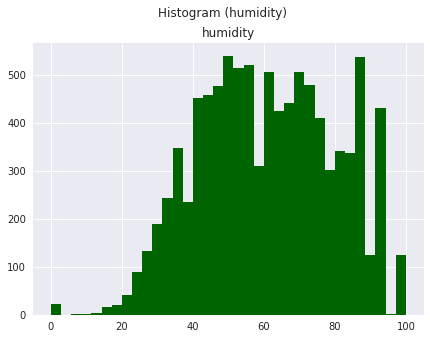

In [ ]:
data[humid].hist(bins =35, figsize=(7,5), color = 'darkgreen')
plt.suptitle("Histogram (humidity)", fontsize=12)

25%, 50%, 75% 값을 기준으로 class를 분류하였습니다.

In [ ]:
def func(x) :
    if 61 < x <= 77 :
      return 'mid-high'
    elif 46 < x <= 61 :
      return 'mid-low'
    elif x <= 46:
      return 'low'
    else:
      return 'high'

data["humid_class"] = data["humidity"].apply(lambda x : func(x)) 

Counter({'high': 2197, 'low': 2478, 'mid-high': 2441, 'mid-low': 2457})

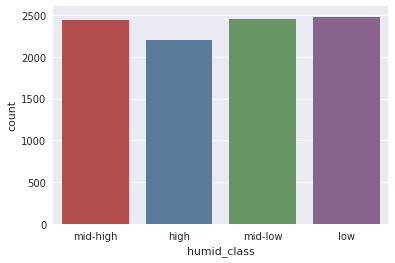

In [ ]:
sns.countplot(x="humid_class", data=data, saturation=0.5, palette= 'Set1')
Counter(data["humid_class"])

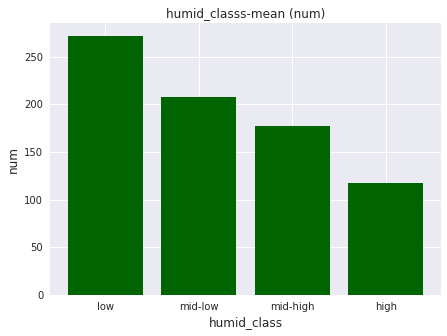

In [ ]:
plt.subplots(figsize=(7,5)) 
data_humid_class_mean = data.groupby(['humid_class'], as_index=False).mean()
data_humid_class_mean_num = data_humid_class_mean[["humid_class", "num"]]
data_humid_class_mean_num = data_humid_class_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_humid_class_mean_num['humid_class'],data_humid_class_mean_num['num'], color = 'darkgreen')
plt.title('humid_classs-mean (num)')
plt.xlabel('humid_class', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

습도가 낮을수록 대여량이 증가함을 알 수 있습니다.

# 5. 등록 대여와 미등록 대여

'registered'와 'casual'데이터를 이용하여 등록 여부와

## 5-1 등록/미등록 대여와 날씨의 관계

### 날씨에 따른 holiday/non-holiday 등록 대여량 비교

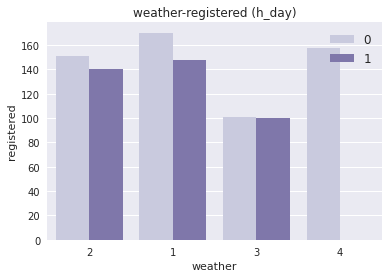

In [ ]:
# Dodged Bar Chart
data['weather'] = data['weather'].astype(str)

sns.barplot(x='weather', y='registered', hue='h_day', data=data, palette = 'Purples', ci=False)
plt.title('weather-registered (h_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

### 날씨에 따른 workingday/ non-workingday 대여량 비교

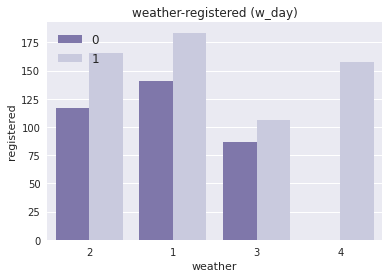

In [ ]:
# Dodged Bar Chart
data['weather'] = data['weather'].astype(str)

sns.barplot(x='weather', y='registered', hue='w_day', data=data, palette = 'Purples_r', ci=False)
plt.title('weather-registered (w_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

위 분석을 통해 날씨가 좋지 않음에도 불구하고 (4) 대여를 하여 이용하는 경우는 대부분 holiday가 아닌 `working day`에 해당함으로 불가피하게 이용한 것임을 알 수 있으며, Level 3 기후인 경우도 holiday인 경우에 이용하는 경우보다 working day인 경우에 이용하는 것이 많은 것으로 파악되었다.

## 4-2 시간대별 등록/미등록 대여

### 시간대별 holiday/non-holiday 등록 대여량

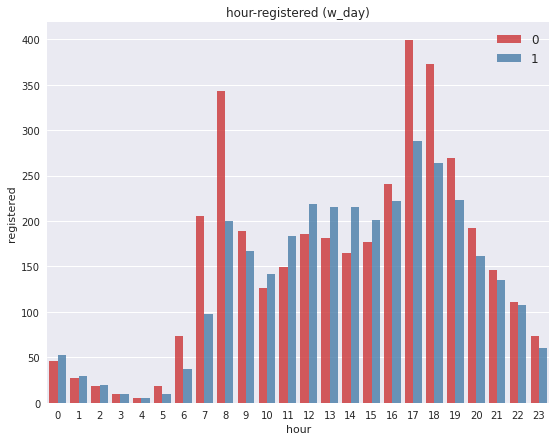

In [ ]:
# Dodged Bar Chart
plt.subplots(figsize=(9,7)) 
sns.barplot(x='hour', y='registered', hue='h_day', data=data, palette = 'Set1',alpha = 0.8,  ci=False)
plt.title('hour-registered (w_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

### 시간대별 workingday/non-workingday 등록 대여량

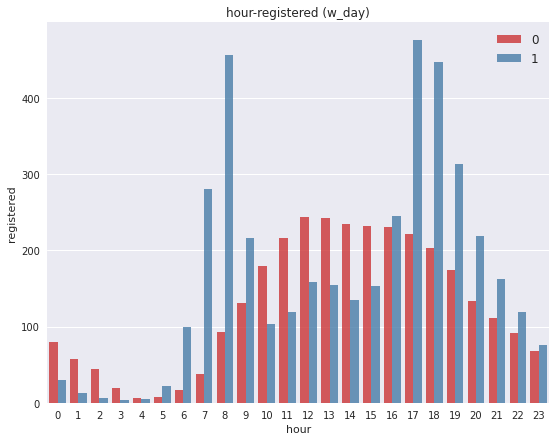

In [ ]:
# Dodged Bar Chart
plt.subplots(figsize=(9,7)) 
sns.barplot(x='hour', y='registered', hue='w_day', data=data, palette = 'Set1',alpha = 0.8,  ci=False)
plt.title('hour-registered (w_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

Holiday가 아닌 경우, 출퇴근 시간에 해당되는 오전 8시와 오후 17-18시에 등록된 자전거 대여량이 급증하는 것을 볼 수 있습니다. 마찬가지로 Working day에 대한 plot을 살펴보아도 7-8시와 17-19시 가량에 등록된 자전거 대여량이 급증하는 것을 볼 수 있다. 이를 통해 평소 출퇴근을 자전거를 이용하는 많은 사람들이 등록된 회원의 신분으로 자전거 대여를 하는 것임을 알 수 있습니다.

### 시간대별 holiday/non-holiday 미등록 대여량

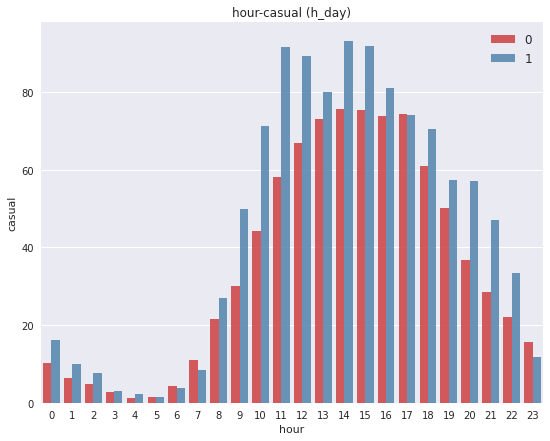

In [ ]:
# Dodged Bar Chart
plt.subplots(figsize=(9,7)) 
sns.barplot(x='hour', y='casual', hue='h_day', data=data, palette = 'Set1', alpha = 0.8,  ci=False)
plt.title('hour-casual (h_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

Holiday에는 미등록 대여의 수가 등록 대여 수를 초과하는 것을 볼 수 있으며, 낮 시간대에 많이 이용되는 것을 알 수 있습니다. (11시 ~ 16시)

### 시간대별 workingday/non-workingday 미등록 대여량

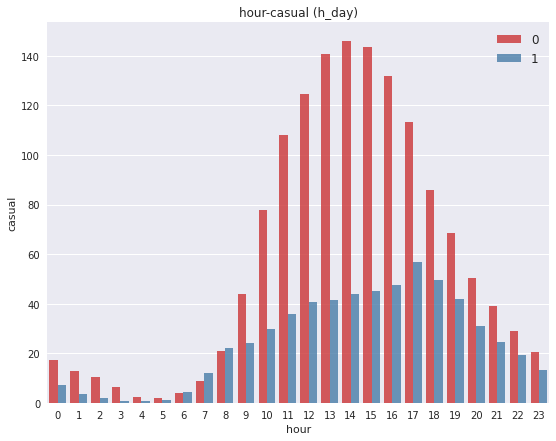

In [ ]:
# Dodged Bar Chart
plt.subplots(figsize=(9,7)) 
sns.barplot(x='hour', y='casual', hue='w_day', data=data, palette = 'Set1', alpha = 0.8,  ci=False)
plt.title('hour-casual (h_day)', fontsize=12)
plt.legend(fontsize=12)
plt.show()

근무일이 아닐 때 미등록 대여량이 훨씬 많아지는 것을 볼 수 있으며, 근무일에 미등록 대여량이 조금이나마 많아지는 시간대는 퇴근 시간인 17-18시입니다. 다만 이조차도 non-workingday의 절반 수준으로, workingday에 미등록 대여를 하는 사람은 거의 없다고 볼 수 있습니다.

## 4-3 요일별 등록/미등록 대여 비교

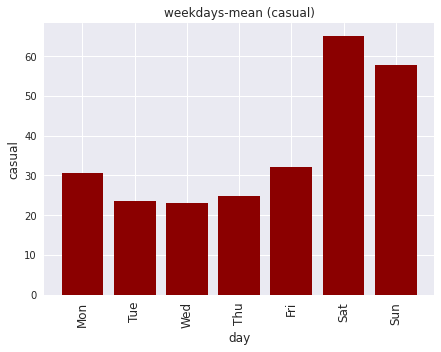

In [ ]:
label = ['Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))
plt.subplots(figsize=(7,5)) 
data_day_mean = data.groupby(['day'], as_index=False).mean()
data_day_mean_casual = data_day_mean[["day", "casual"]] #feature 1
data_day_mean_casual = data_day_mean_casual.sort_values(by="casual", ascending=False)
plt.bar(data_day_mean_casual['day'],data_day_mean_casual['casual'], color = 'darkred')
plt.title('weekdays-mean (casual)')
plt.xlabel('day', fontsize=12)
plt.ylabel('casual', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=90)
plt.show()


위와 비슷한 맥락으로 주말에 미등록 사용자가 급증하는 추세를 보인다는 것을 알 수 있습니다.

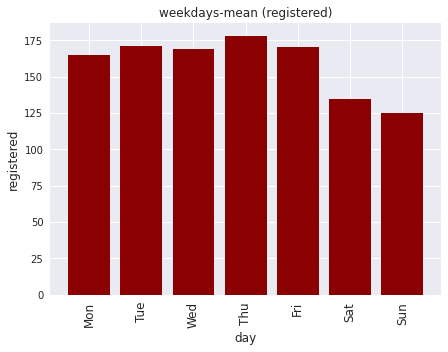

In [ ]:
plt.subplots(figsize=(7,5)) 
data_day_mean = data.groupby(['day'], as_index=False).mean()
data_day_mean_registered = data_day_mean[["day", "registered"]] #feature 1
data_day_mean_registered = data_day_mean_registered.sort_values(by="registered", ascending=False)
plt.bar(data_day_mean_registered['day'],data_day_mean_registered['registered'], color = 'darkred')
plt.title('weekdays-mean (registered)')
plt.xlabel('day', fontsize=12)
plt.ylabel('registered', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=90)
plt.show()

반면 등록 사용자수는 월요일부터 금요일까지 큰 변화를 보이지 않다가 주말에 감소하는 경향을 보입니다.

**전체적으로 '쉬는 날'에 해당하는 Holiday나 주말에는 미등록 사용자의 수가 증가하며, 이런 날에는 특정 시간대보다 낮 시간에 고루 사용자 수가 분포해있는 반면에, Working day에 해당하는 Holiday가 아닌 날이나 주중에는 꾸준히 많은 수의 등록 사용자들이 자전거를 대여하여 사용하며, 출퇴근 시간에 해당하는 오전 7-8시 그리고 오후 17-18시에 대여량이 급증하여 몰리는 현상을 확인할 수 있었습니다.**

앞서 월별 대여량 비교에서도 살펴보았듯이, 계절별로 대여량을 비교해보면 **가을 > 여름 > 겨울 > 봄** 순으로 대여량이 많은 것을 알 수 있습니다.

# 5. 온도 관련 분석

Feature 생성 
temp와 atemp 간 상관관계가 매우 크므로 다중공선성 문제가 발생할 가능성이 매우 높기 때문에 다음과 같은 새로운 feature를 생성하였습니다.
- **temp_total** = temp + atemp (두 온도의 합)
- **temp_gap** = atemp - temp (체감온도 - 실제온도. 실제 온도보다 체감온도보다 높은 경우 파악하기 위해)

In [ ]:
data['temp_total'] = data['temp'] + data['atemp']
data['temp_gap'] = data['atemp'] - data['temp']

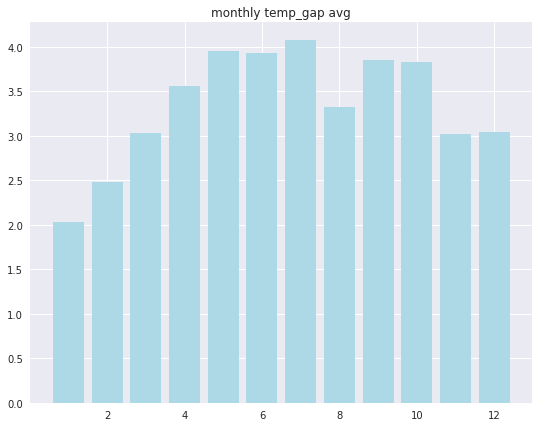

In [ ]:
plt.subplots(figsize=(9,7)) 
data_temp_mean = data.groupby(['month'], as_index=False).mean()
plt.bar(data_temp_mean['month'],data_temp_mean['temp_gap'], color = 'lightblue')
plt.title('monthly temp_gap avg')
plt.xticks()
plt.show()

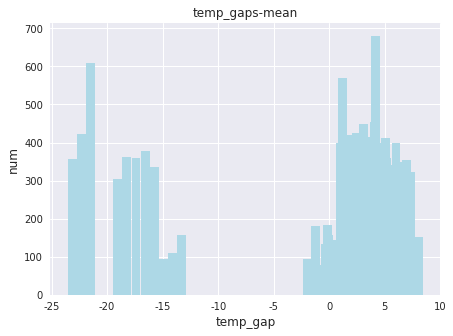

In [ ]:
plt.subplots(figsize=(7,5)) 
data_temp_gap_mean = data.groupby(['temp_gap'], as_index=False).mean()
data_temp_gap_mean_num = data_temp_gap_mean[["temp_gap", "num"]] #feature 1
data_temp_gap_mean_num = data_temp_gap_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_temp_gap_mean_num['temp_gap'],data_temp_gap_mean_num['num'], color = 'lightblue')
plt.title('temp_gaps-mean')	
plt.xlabel('temp_gap', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

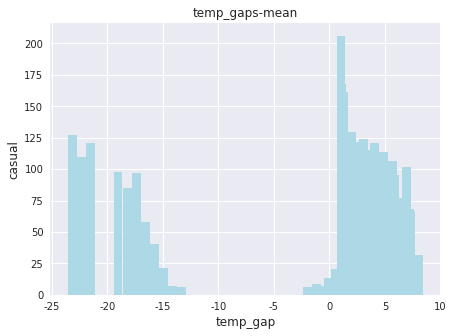

In [ ]:
plt.subplots(figsize=(7,5)) 
data_temp_gap_mean = data.groupby(['temp_gap'], as_index=False).mean()
data_temp_gap_mean_casual = data_temp_gap_mean[["temp_gap", "casual"]] #feature 1
data_temp_gap_mean_casual = data_temp_gap_mean_casual.sort_values(by="casual", ascending=False)
plt.bar(data_temp_gap_mean_casual['temp_gap'],data_temp_gap_mean_casual['casual'], color = 'lightblue')
plt.title('temp_gaps-mean')	
plt.xlabel('temp_gap', fontsize=12)
plt.ylabel('casual', fontsize=12)
plt.show()


월별 체감기온과 실제기온의 차이가 겨울을 제외하고는 1년 내내 그렇게 크지 않은 것으로 보아 대여량에 큰 영향을 미치지 않을 것이라 볼 수 있습니다.
다만 대체적으로 체감 기온 - 실제 기온 > 0, 즉 실제 기온이 체감 기온보다 더 낮을 때 대여량이 더 많아지는 것을 알 수 있으며, 미등록 대여의 경우 더욱 그렇다는 것을 알 수 있습니다.

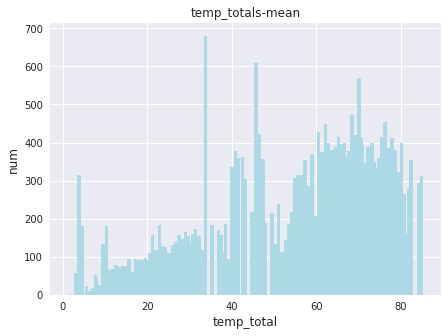

In [ ]:
plt.subplots(figsize=(7,5)) 
data_temp_total_mean = data.groupby(['temp_total'], as_index=False).mean()
data_temp_total_mean_num = data_temp_total_mean[["temp_total", "num"]] #feature 1
data_temp_total_mean_num = data_temp_total_mean_num.sort_values(by="num", ascending=False)
plt.bar(data_temp_total_mean_num['temp_total'],data_temp_total_mean_num['num'], color = 'lightblue')
plt.title('temp_totals-mean')	
plt.xlabel('temp_total', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.show()

대체적으로 체감기온과 실제기온의 합이 높을 때, 즉 추울 때보다 따뜻할수록 대여량이 많은 것을 확인할 수 있습니다.

In [ ]:
data.head()

,index,datetime,season,h_day,w_day,weather,temp,atemp,humidity,windspeed,casual,registered,num,log_windspeed,log_casual,datetime_dt,year,month,hour,day,day_night,date,humid_class,temp_total,temp_gap
0,5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1.792293,-inf,2011-01-01 05:00:00,2011,1,5,5,night,01,mid-high,22.720,3.040
1,10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2.833090,2.484907,2011-01-01 10:00:00,2011,1,10,5,day,01,mid-high,35.275,4.115
2,11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2.944502,3.258097,2011-01-01 11:00:00,2011,1,11,5,day,01,high,31.425,1.905
3,12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2.944502,3.367296,2011-01-01 12:00:00,2011,1,12,5,day,01,mid-high,38.430,3.990
4,13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2.995707,3.850148,2011-01-01 13:00:00,2011,1,13,5,day,01,mid-high,41.585,3.865


# 6. 최종 결론 및 인사이트

**초기 변수**
1. **datetime** - hourly date + timestamp
2. **season**
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday
5. **weather**
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

총 12개의 변수



---

---







본 분석에는 주로 **count** 변수를 타깃 변수로 삼았으며, 분석 내용에 따라 **casual**과 **registered**에 대한 분석도 진행했습니다.

1. **datetime** - hourly date + timestamp  
날짜를 나타내는 datetime변수를 object (일반 문자열 형태)에서 'datetime' 형태로 변환해주었으며, 이로부터 다음과 같은 변수들을 추출하여 생성하였고, 각 변수에 대한 분석을 진행했습니다.

  - **year**: 연도 (2011/2012)
  - **month**: 월  
  겨울에 해당하는 1월과 2월에 대여량이 가장 적으며, 이후 날씨가 풀리는 3월과 4월에 조금씩 증가하다가 6월부터 10월 간 가장 대여량이 많은 것을 볼 수 있었습니다.
  - **date**: 일  
  일별 대여량에는 큰 차이가 없었습니다. 
  - **hour**: 시간  
  하루 중 가장 대여량이 많은 시간대는 퇴근 시간에 해당하는 17시와 18시, 그리고 출근 시간인 오전 08시임을 알 수 있었습니다. 21시 이후부터 사용량이 대폭 감소하며 새벽에는 사용량이 거의 없다가 오전 07시부터 본격적으로 대여가 시작됨을 알 수 있었습니다.
  - **day**: 요일 (월/화/수/목/금/토/일)  
  요일에 따른 대여량에는 차이가 거의 없는 것을 확인하였습니다. 다만 요일별 등록/미등록 대여는 차이를 보였는데, 주말에 미등록 사용자가 급증하는 추세를 보이는 반면 등록 사용자수는 월요일부터 금요일까지 큰 변화를 보이지 않다가 주말에 감소하는 경향을 보인다는 것을 알 수 있었습니다.
  - **day_night**: 낮/밤 (06시 - 17시: day, 18시 - 05시: night으로 구분)  
  주말(sat, sun)에 낮에 대여량이 증가하고 밤에는 대여량이 감소한다는 것을 알 수 있으며, 주중 대여량은 큰 차이 없이 모두 비슷한 대여량 수치를 보인다는 것을 알 수 있었습니다.

2. **season**  
  0/1/2/3으로 표현되어 있던 계절 변수는 각각 Spring, Summer, Fall, Winter라는 Label을 붙여 시각화를 진행했으며, 계절별로 대여량의 증감을 비교하는 데에 사용하였습니다.  
  겨울과 봄에는 대여량이 비교적 적으며, 여름과 가을에 대여량이 많은 것을 알 수 있었습니다.


3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday

  휴일을 나타내는 **holiday** 변수와 근무일을 나타내는 **workingday** 변수는, 날씨 그리고 시간대 변수와 혼합하여 휴일일 때와 아닐 때 대여량의 차이를 보여주는 분석을 진행했으며, 출퇴근을 하지 않는 휴일에는 주로 낮 시간대에 대여량이 많고 출퇴근을 해야 하는 근무일에는 출퇴근 시간에 해당하는 7-8시와 17-18시에 대여량이 많은 것을 알 수 있었습니다.  
   또한 날씨가 좋지 않음에도 불구하고 대여를 하여 이용하는 경우는 대부분 holiday가 아닌 working day에 해당함으로 불가피하게 이용한 것임을 알 수 있었습니다. 

5. **weather**
  총 4개의 class로 나뉜 **weather**변수는 악천후에 자전거 대여량이 어떻게 변화하는지 알아보기 위해 사용하였습니다. 다만 전체 데이터 중 Level 4에 해당되는 날씨는 하루 밖에 없다는 것을 알게 되었고, 그로 인해 악천후일 때보다 그렇지 않을 때 대여량이 더 많다는 사실은 알 우 있었지만, Level4에 해당되는 값은 평균 대여량이, 다른 Level과 달리 평균값이 아닌 하루의 수치일 것이기 때문에 (data의 개수가 하나이기 때문) bias가 있는 plot이 생성될 것이라고 생각하여 Level3과 4를 비교하는 데에는 무리가 있다고 판단하여 간단한 분석만 진행할 수 있었다는 한계점이 있었습니다.

6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius  

  파생변수 생성: temp와 atemp 간 상관관계가 매우 크므로 다중공선성 문제가 발생할 가능성이 매우 높기 때문에 다음과 같은 새로운 feature를 생성하였습니다.
  - **temp_total** = temp + atemp (두 온도의 합)
  - **temp_gap** = atemp - temp (체감온도 - 실제온도. 실제 온도보다 체감온도보다 높은 경우 파악하기 위해)

  대체적으로 체감기온과 실제기온의 합이 높을 때, 즉 추울 때보다 따뜻할수록 대여량이 많은 것을 확인할 수 있었습니다. 월별 체감기온과 실제기온의 차이는 대여량에 큰 영향을 미치지 않을 것이라 보았지만 대체적으로 실제 기온이 체감 기온보다 더 낮을 때 대여량이 더 많아지는 것을 알 수 있으며, 미등록 대여의 경우 더욱 그렇다는 것을 파악할 수 있었습니다.

8. **humidity** - relative humidity  
습도가 낮을수록 대여량이 증가함을 알 수 있었습니다.

9. **windspeed** - wind speed  
  왼쪽으로 치우쳐져 있는 변수값들의 분포를 정규분포로 근사시키기 위해 로그 변환을 진행했습니다. 변수 windspeed, casual, registered,num의 중 num과 registered는 타깃 변수로 사용될 확률이 높기 때문에 로그변환을 하지 않고, Log casual을 변환할 경우 1400개 가량의 데이터 손실이 일어남으로 이들을 제외한 나머지 한 개의 변수 즉 windspeed에 대해 로그 변환을 실행해주었다. -> **log_windspeed**

등록/미등록대여 타깃변수
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated

 '쉬는 날'에 해당하는 Holiday나 주말에는 미등록 사용자의 수가 증가한다는 것을 파악하였습니다. 이런 날에는 특정 시간대보다 낮 시간에 고루 사용자 수가 분포해있는 반면에, Working day에 해당하는 Holiday가 아닌 날이나 주중에는 꾸준히 많은 수의 등록 사용자들이 자전거를 대여하여 사용하며, 출퇴근 시간에 해당하는 오전 7-8시 그리고 오후 17-18시에 대여량이 급증하여 몰리는 현상을 확인할 수 있었습니다.

타깃 변수로 사용 (총 대여수)
12. **count** - number of total rentals